<h1>STEP 2: Exploratory Data Analysis (EDA)

<h2>Descriptive statistics

In [3]:
import pandas as pd
df = pd.read_csv("cleaned_dataset_for_powerbi.csv") 



<h2>Mean, Median, Mode, and Standard Deviation

In [8]:
# Mean
print("✅ Mean:\n",'{:.2f}'.format)
print( df.mean(numeric_only=True))

# Median
print("\n✅ Median:\n", '{:.2f}'.format,df.median(numeric_only=True))

# Mode
print("\n✅ Mode:\n",  '{:.2f}'.format, df.mode(numeric_only=True).iloc[0]) 
# Standard Deviation
print("\n✅ Standard Deviation:\n",  '{:.2f}'.format, df.std(numeric_only=True))


✅ Mean:
 <built-in method format of str object at 0x00000200C715BA80>
Unnamed: 0           2.771164e+07
fare_amount          1.134532e+01
pickup_longitude    -7.393005e+01
pickup_latitude      4.070559e+01
dropoff_longitude   -7.391710e+01
dropoff_latitude     4.068858e+01
passenger_count      1.685208e+00
dtype: float64

✅ Median:
 <built-in method format of str object at 0x00000200C715BED0> Unnamed: 0           2.774823e+07
fare_amount          8.500000e+00
pickup_longitude    -7.398210e+01
pickup_latitude      4.075329e+01
dropoff_longitude   -7.398052e+01
dropoff_latitude     4.075373e+01
passenger_count      1.000000e+00
dtype: float64

✅ Mode:
 <built-in method format of str object at 0x00000200C7158750> Unnamed: 0            1.000000
fare_amount           6.500000
pickup_longitude    -73.137393
pickup_latitude      41.366138
dropoff_longitude   -73.137393
dropoff_latitude     41.366138
passenger_count       1.000000
Name: 0, dtype: float64

✅ Standard Deviation:
 <built-in metho

In [9]:
# Get descriptive stats with quartiles
print(df['fare_amount'].describe())


count    196012.000000
mean         11.345317
std           9.795760
min           0.010000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64


In [10]:
# Range = Max - Min
fare_range = df['fare_amount'].max() - df['fare_amount'].min()
print(f"Fare Amount Range: ${fare_range:.2f}")


Fare Amount Range: $498.99


In [11]:
# Calculate Q1 and Q3
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")


Q1: 6.0
Q3: 12.5
IQR: 6.5


<h2>Visualizations showing fare distribution patterns

<h4>Histogram of fare_amount

In [15]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.
C:\Users\izaba\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


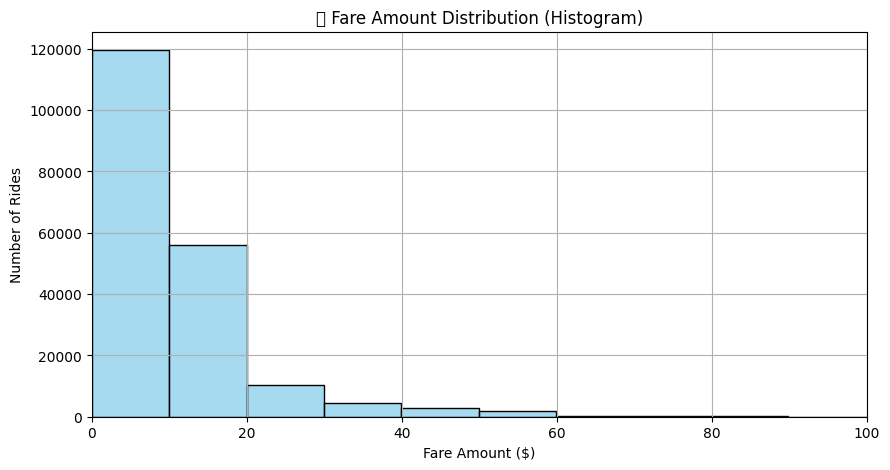

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='fare_amount', bins=50, kde=False, color='skyblue')
plt.title('🔹 Fare Amount Distribution (Histogram)')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Number of Rides')
plt.xlim(0, 100)  # to remove extreme outliers from the plot
plt.grid(True)
plt.show()


<h3>Histogram + KDE (Smoothed Curve)

C:\Users\izaba\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


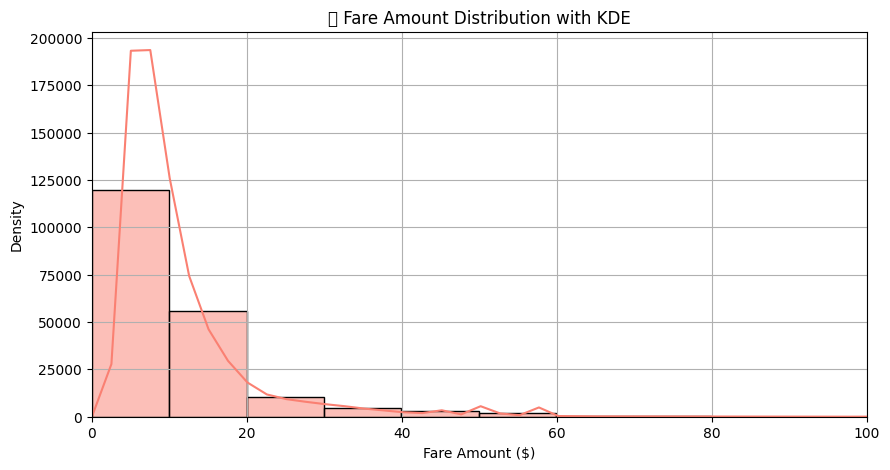

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='fare_amount', bins=50, kde=True, color='salmon')
plt.title('🔹 Fare Amount Distribution with KDE')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Density')
plt.xlim(0, 100)
plt.grid(True)
plt.show()


<h3>Boxplot of fare_amount

C:\Users\izaba\AppData\Local\Temp\ipykernel_13388\3739506964.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='passenger_count', y='fare_amount', palette='coolwarm')
C:\Users\izaba\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


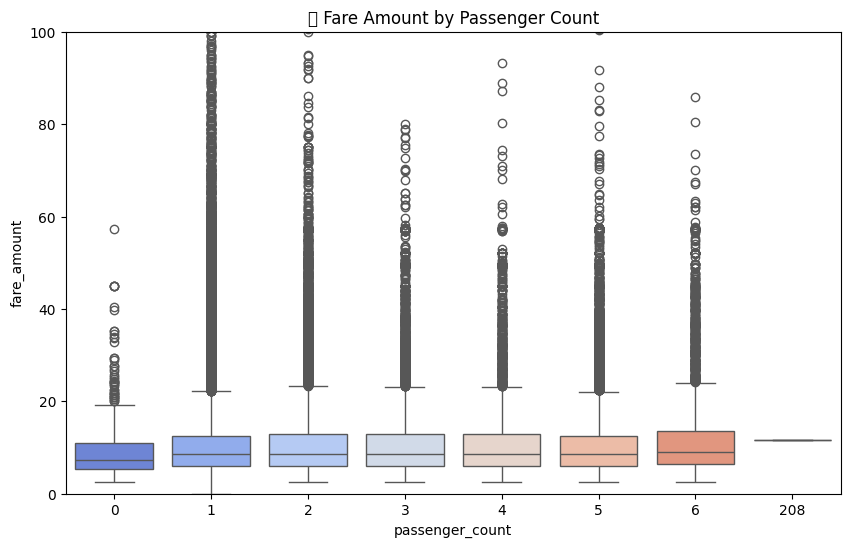

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='passenger_count', y='fare_amount', palette='coolwarm')
plt.title("🎯 Fare Amount by Passenger Count")
plt.ylim(0, 100)
plt.show()


<h2>Relationships between key variables: Fare amount vs. distance traveled

<h3>Create a distance column (Haversine formula)

In [20]:
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in km
    R = 6371  
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # result in kilometers

# Apply to your dataframe
df['distance_km'] = haversine_distance(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
)


<h3>Visualize fare_amount vs distance_km

C:\Users\izaba\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128662 (\N{ONCOMING TAXI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


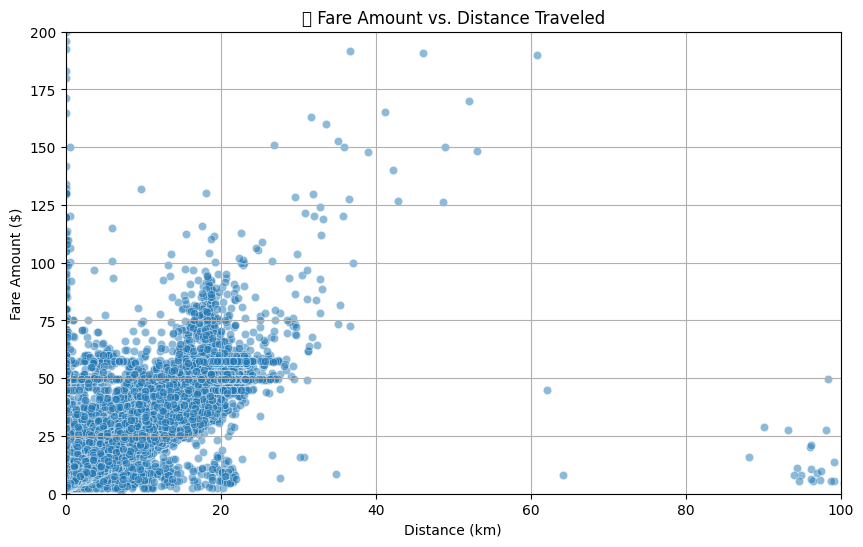

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance_km', y='fare_amount', alpha=0.5)
plt.title("🚖 Fare Amount vs. Distance Traveled")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.xlim(0, 100)   # Optional: zoom in to ignore outliers
plt.ylim(0, 200)
plt.grid(True)
plt.show()


<h2>Fare amount vs. time of day

C:\Users\izaba\AppData\Local\Temp\ipykernel_13388\2509114074.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='pickup_hour', y='fare_amount', palette='coolwarm')
C:\Users\izaba\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


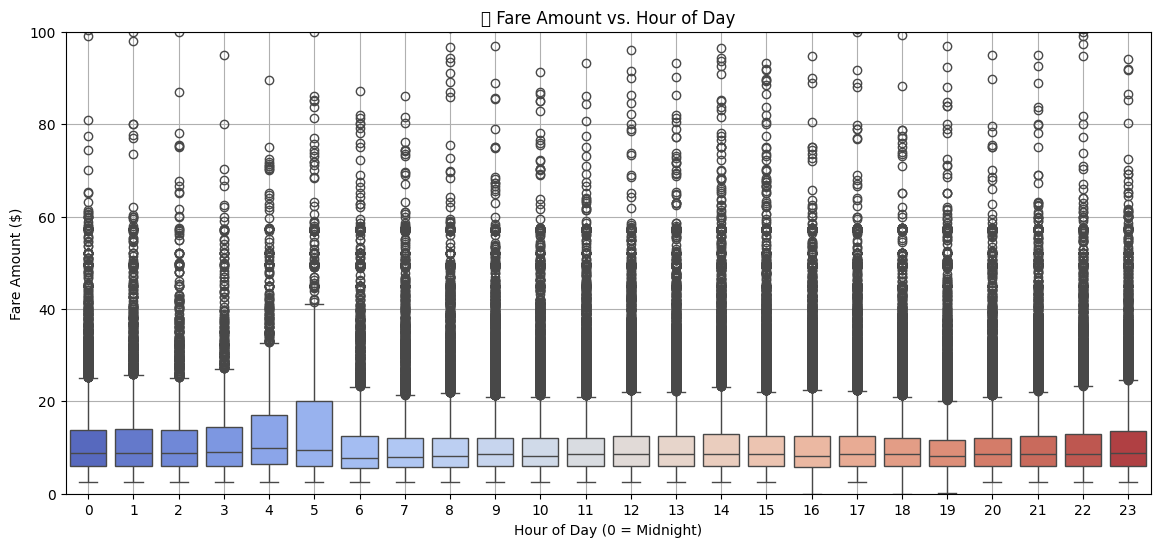

In [26]:
# Convert to datetime format if it's not already
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract hour
df['pickup_hour'] = df['pickup_datetime'].dt.hour

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='pickup_hour', y='fare_amount', palette='coolwarm')
plt.title("🕒 Fare Amount vs. Hour of Day")
plt.xlabel("Hour of Day (0 = Midnight)")
plt.ylabel("Fare Amount ($)")
plt.ylim(0, 100)  # To reduce outlier clutter
plt.grid(True)
plt.show()



C:\Users\izaba\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


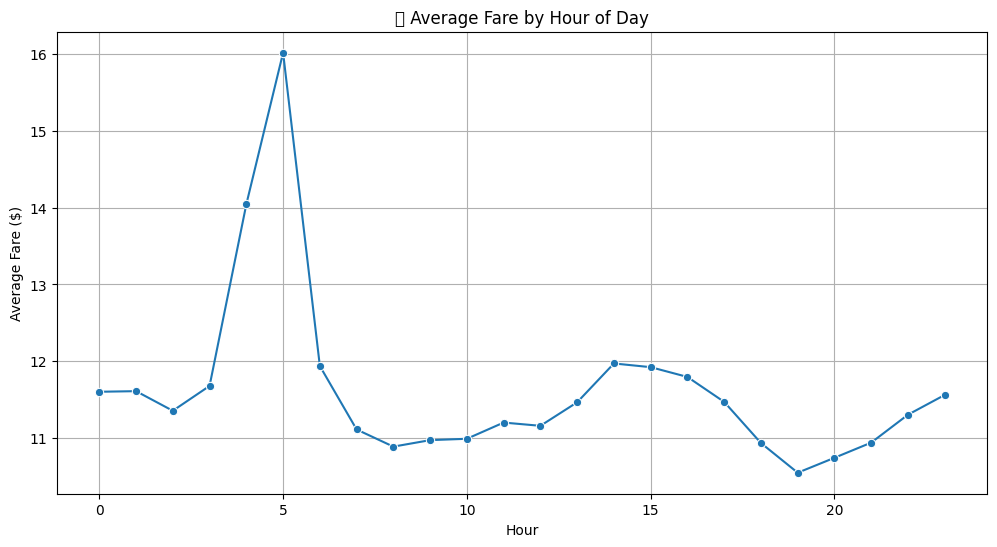

In [30]:
hourly_fares = df.groupby('pickup_hour')['fare_amount'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_fares.index, y=hourly_fares.values, marker='o')
plt.title("📈 Average Fare by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.show()


<h3>Additional relevant correlations


In [39]:
df = df[df['distance_km'] < 100]  # or even < 50 if you're being strict
print(df[['fare_amount', 'distance_km']].corr())



             fare_amount  distance_km
fare_amount     1.000000     0.872087
distance_km     0.872087     1.000000


In [40]:
# Keep only rows with reasonable values
df = df[
    (df['distance_km'] > 0.1) &
    (df['fare_amount'] > 2) & 
    (df['fare_amount'] < 100)
]

# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Show top correlations with fare_amount
print(correlation_matrix['fare_amount'].sort_values(ascending=False))


fare_amount          1.000000
distance_km          0.872087
passenger_count      0.015380
pickup_longitude     0.012647
dropoff_longitude    0.011176
Unnamed: 0          -0.000092
pickup_latitude     -0.009173
dropoff_latitude    -0.009353
pickup_hour         -0.020378
Name: fare_amount, dtype: float64


<h1>Step 3: Feature Engineering

<h2> Extract Hour, Day, and Month from your timestamp

In [46]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

# Extract hour, day, month
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_weekday'] = df['pickup_datetime'].dt.day_name()  # e.g., Monday

df[['pickup_datetime', 'pickup_hour', 'pickup_day', 'pickup_month', 'pickup_weekday']].head()


,pickup_datetime,pickup_hour,pickup_day,pickup_month,pickup_weekday
0,2015-05-07 19:52:06+00:00,19,7,5,Thursday
1,2009-07-17 20:04:56+00:00,20,17,7,Friday
2,2009-08-24 21:45:00+00:00,21,24,8,Monday
3,2009-06-26 08:22:21+00:00,8,26,6,Friday
4,2014-08-28 17:47:00+00:00,17,28,8,Thursday


<h2>▪ Day of week categorization

In [49]:
# Extract day name
df['pickup_weekday'] = df['pickup_datetime'].dt.day_name()

# Define ordered category for consistent charts
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['pickup_weekday'] = pd.Categorical(df['pickup_weekday'], categories=weekday_order, ordered=True)


<h2>Peak/off-peak time indicators

In [51]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour


In [52]:
def label_peak_hour(hour):
    if 7 <= hour <= 10 or 16 <= hour <= 19:
        return 'Peak'
    else:
        return 'Off-Peak'

df['time_period'] = df['pickup_hour'].apply(label_peak_hour)


<h2> Identify and properly encode categorical variables

In [53]:
df.dtypes


Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
distance_km                      float64
pickup_hour                        int32
Pickup_hour                        int32
Pickup_day                         int32
Pickup_month                       int32
Pickup_weekday                    object
pickup_day                         int32
pickup_month                       int32
pickup_weekday                  category
time_period                       object
dtype: object

In [54]:
df.drop(columns=[
    'Pickup_hour', 'Pickup_day', 'Pickup_month', 'Pickup_weekday'
], inplace=True)


In [56]:
df = pd.get_dummies(df, columns=['pickup_weekday', 'time_period'], drop_first=True)


<h2>Save the enhanced dataset

In [57]:
# Save the cleaned and feature-engineered dataset
df.to_csv("enhanced_uber_data.csv", index=False)

print("✅ Dataset saved as 'enhanced_uber_data.csv'")


✅ Dataset saved as 'enhanced_uber_data.csv'
